# 8o Lab de PSD (notebook para preencher com os resultados)

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

### Número do Grupo : Grupo 2
-Felipe Lopes Duarte
-Pedro Klesse
-Vitor Caligaris Figueira

In [ ]:
#
# Primeiro vamos importar as bibliotecas necessárias
#
import numpy as np
import matplotlib.pyplot as plt
import cv2

# **1.0 - Filtro de Gabor 2D (domínio espacial)**

O filtro de Gabor é um filtro do tipo passa-banda que possui alguns parâmetros que permitem que ele possa ser ajustado para realçar informações com diferentes escalas e orientações em uma imagem. A sua **forma geral complexa** é dada pela equação abaixo.

$$\begin{aligned}
\psi(x,y; f_o, \theta, \sigma_x, \sigma_y) = \frac{f_o^2}{\pi \sigma_x \sigma_y} \exp \left(-\frac{f_o^2}{\sigma_x^2}x'^2 - \frac{f_o^2}{\sigma_y^2}y'^2 \right) \exp\left( j 2\pi f_o x' \right)
\end{aligned}$$

$$\begin{aligned}
x'&= x\cos\theta + y\sin\theta\\
y'&=-x\sin\theta + y\cos\theta\\
\end{aligned}$$

$f_o$ = frequência da onda senoidal

$\theta$ = ângulo de orientação do filtro

$\sigma_x$ e $\sigma_y$ = os desvios padrão da Gaussiana 2D  

## **1.1 - Implementação do filtro de Gabor 2D complexo - domínio espacial**

Implemente o filtro de Gabor 2D (no domínio espacial) usando a equação fornecida acima.

In [ ]:
#
# Complex Gabor filter - image domain
#
def Gabor_image_domain(M,N,fo,theta,sigma_x,sigma_y):

    nx = np.linspace(-(M/2), M/2, M)
    ny = np.linspace(-(N/2), N/2, N)
    x_, y_ = np.meshgrid(nx,ny)

    xv = x_*np.cos(theta) + y_*np.sin(theta)
    yv = -x_*np.sin(theta) + y_*np.cos(theta)



    var1 = (fo * fo)/(np.pi * sigma_x * sigma_y)
    var2 = -1 * ((fo * fo) * (xv * xv))/(sigma_x * sigma_x)
    var3 = -1 * ((fo * fo) * (yv * yv))/(sigma_y * sigma_y)
    var4 = 1j * 2 * np.pi * fo * xv

    gab = var1 * np.exp(var2+var3) * np.exp(var4)

    return gab

## **1.2 - Criação de um filtro de Gabor 2D**

Crie um filtro de Gabor 2D com os parâmetros fornecidos a seguir e plote as partes par e ímpar do filtro complexo.

In [ ]:
M = 32
N = 32
wavelength = 6 # 5 pixels
frequency = 1.0/wavelength
theta = -np.pi/4

sigma_x = 0.6
sigma_y = 1.2

gab = Gabor_image_domain(M, N, frequency, theta, sigma_x, sigma_y)

gab_par = np.real(gab)
gab_impar = np.imag(gab)

#gabor_par = Gabor_image_domain(M, N, frequency, theta, sigma_x, sigma_y).real
#gabor_impar = Gabor_image_domain(M, N, frequency, theta, sigma_x, sigma_y).imag


(<matplotlib.axes._subplots.AxesSubplot at 0x7f4b90d461d0>,
 Text(0.5, 1.0, 'Filtro de Gabor Ímpar'))

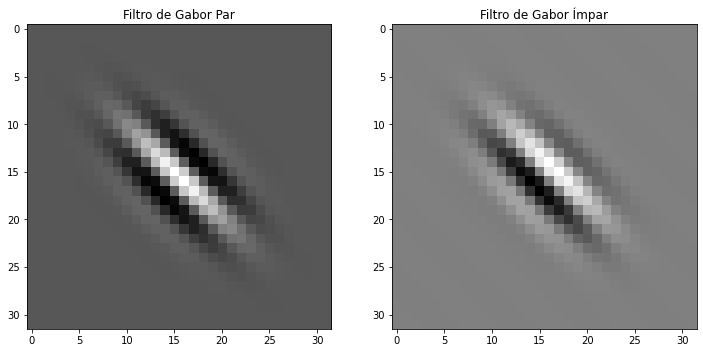

In [ ]:
#
# Plote os filtros de Gabor 2D par e ímpar
#
plt.figure(figsize=(12,12))

plt.subplot(1, 2, 1), plt.imshow(gab_par,cmap='gray'), plt.title('Filtro de Gabor Par')

plt.subplot(1, 2, 2), plt.imshow(gab_impar,cmap='gray'), plt.title('Filtro de Gabor Ímpar')

## **1.3 - Filtragem de uma imagem**

Utilize os **filtros par e ímpar** criados anteriormente para filtrar a imagem fornecida. Analise as imagems filtradas com os dois filtros.

(512, 512)


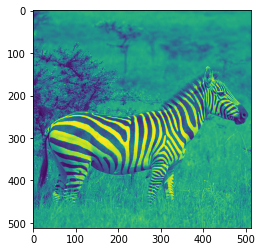

In [ ]:
path = "/content/"
filename = "Zebra.jpg"
imageRGB= cv2.imread(path + filename)
imageGRAY = cv2.cvtColor(imageRGB, cv2.COLOR_BGR2GRAY)
plt.imshow(imageGRAY)

print(imageGRAY.shape)

A seguir realize a filtragem da imagem

(<matplotlib.axes._subplots.AxesSubplot at 0x7f4b90bf7690>,
 Text(0.5, 1.0, 'Imagem filtrada - Ímpar'))

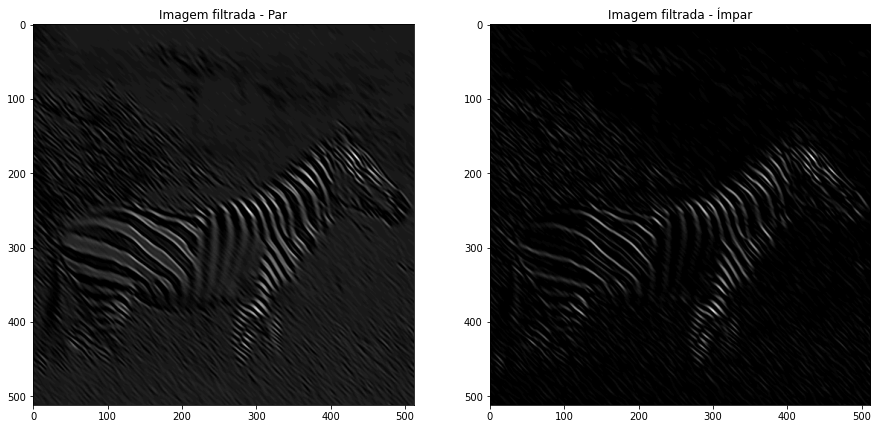

In [ ]:
plt.figure(figsize=(15,15))
plt.subplot(1, 2, 1), plt.imshow(cv2.filter2D(imageGRAY, -1, gab_par),cmap='gray'), plt.title('Imagem filtrada - Par')

plt.subplot(1, 2, 2), plt.imshow(cv2.filter2D(imageGRAY, -1, gab_impar),cmap='gray'), plt.title('Imagem filtrada - Ímpar')

# **2.0 - Filtro de Gabor 2D (domínio frequência)**

No domínio da frequência, o filtro de Gabor 2D normalizado é definido por

$$\begin{aligned}
\Psi(u,v; f_o, \theta, \sigma_u, \sigma_v) = \exp \left(-\pi^2 \left( \frac{u'- f_o}{\sigma_u^2} + \frac{v'}{\sigma_v^2} \right) \right)
\end{aligned}$$

$$\begin{aligned}
u'&= u\cos\theta + v\sin\theta\\
v'&=-u\sin\theta + v\cos\theta\\
\end{aligned}$$

$f_o$ = frequência da onda senoidal

$\theta$ = ângulo de orientação do filtro

$\sigma_u$ e $\sigma_v$ = os desvios padrão da Gaussiana 2D na frequência

**OBS1**: Quando projetamos o filtro no domínio da frequência precisamos fazer com que $u$ e $v$ variem entre -0.5 e 0.5

**OBS2**: Para efeito de análise, observe que a seguinte relação acontece $\sigma_u = \frac{1}{2\pi \sigma_x}$ e $\sigma_v = \frac{1}{2\pi \sigma_y}$

## **2.1 - Implementação do filtro de Gabor 2D - domínio frequência**

In [ ]:
#
# Complex Gabor filter - frequency domain
#
def Gabor_freq_domain(M,N,f,theta,sigma_u,sigma_v):


    nu = np.linspace(-(M/2), M/2 , M)/M
    nv = np.linspace(-(N/2), N/2, N)/N

    u_, v_ = np.meshgrid(nu,nv)

    uv = u_*np.cos(theta) + v_*np.sin(theta)
    vv = -u_*np.sin(theta) + v_*np.cos(theta)

    var1 = - np.pi**2
    var2 = ((uv-f)**2) / (sigma_u**2)
    var3 = (vv**2)/sigma_v**2

    gab = np.exp(var1*(var2+var3))

    return gab

## **2.2 - Crie o filtro usando os parâmetros abaixo**

Crie um filtro Gabor 2D no domínio da frequência usando os parâmetros abaixo e plote as partes par e ímpar do filtro.

In [ ]:
sigma_u = 1/(2*np.pi*sigma_x)
sigma_v = 1/(2*np.pi*sigma_y)

M = 512
N = 512

gab_freq = Gabor_freq_domain(M, N, frequency, theta, sigma_u, sigma_v)

gab_freq_par = np.real(Gabor_freq_domain(M, N, frequency, theta, sigma_u, sigma_v))
gab_freq_impar = np.imag(Gabor_freq_domain(M, N, frequency, theta, sigma_u, sigma_v))

(<matplotlib.axes._subplots.AxesSubplot at 0x7f4b90ad4550>,
 Text(0.5, 1.0, 'Filtro filtrada frequência- Ímpar'))

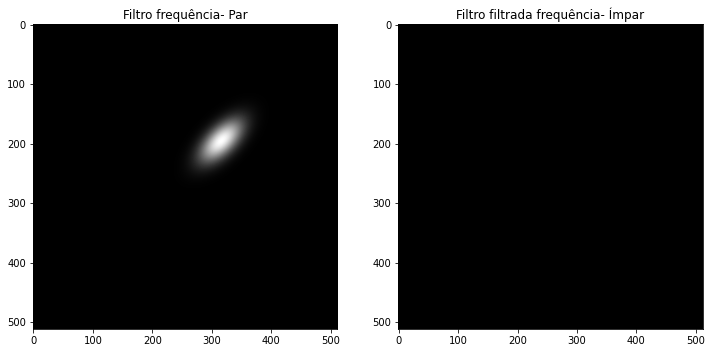

In [ ]:
plt.figure(figsize=(12,12))
plt.subplot(1, 2, 1),  plt.imshow(gab_freq_par,cmap='gray'), plt.title('Filtro frequência- Par')

plt.subplot(1, 2, 2), plt.imshow(gab_freq_impar,cmap='gray'), plt.title('Filtro filtrada frequência- Ímpar')

## **2.2 - Filtragem no domínio frequência**

Utilizando o filtro Gabor 2D complexo implementado no domínio da frequência, realize a filtragem da imagem fornecida e **plote a magnitude do espectro de Fourier e a imagem filtrada**.

**DICA**: Para facilitar, crie o filtro com as mesmas dimensões da imagem.

(<matplotlib.axes._subplots.AxesSubplot at 0x7f4b90a56690>,
 Text(0.5, 1.0, 'Magnitude'))

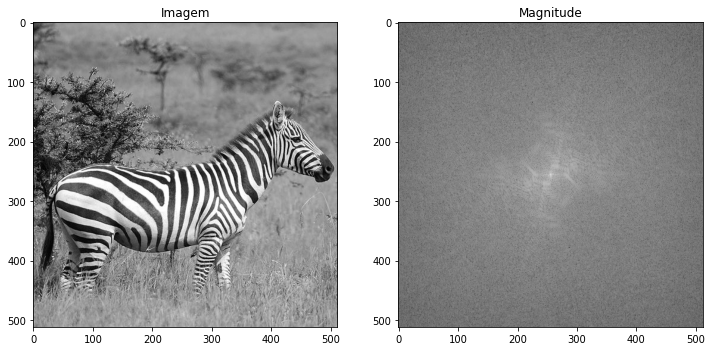

In [ ]:
#
# Mostre a imagem da magnitude do espectro de Fourier
#

plt.figure(figsize=(12,12))
image_fft = np.fft.fft2(imageGRAY)
image_fft = np.fft.fftshift(image_fft)
magnitude_depois =  30*np.log(np.abs(image_fft)+1)
plt.subplot(1, 2, 1),  plt.imshow(imageGRAY,cmap='gray'), plt.title('Imagem')
plt.subplot(1, 2, 2),  plt.imshow(magnitude_depois,cmap='gray'), plt.title('Magnitude')



In [ ]:
#
# Faça a filtragem da imagem no domínio da frequência
#
img_fft = np.fft.fft2(imageGRAY)
img_fft_shifted = np.fft.fftshift(img_fft)

img_filtered = img_fft_shifted*gab_freq



(<matplotlib.axes._subplots.AxesSubplot at 0x7f4b908b0ad0>,
 Text(0.5, 1.0, 'Imagem Filtrado'))

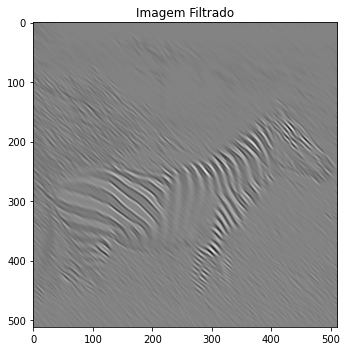

In [ ]:
#
# Retorne para o domínio da imagem e mostre a imagem filtrada n
#
img_final = np.fft.ifftshift(img_filtered)
img_fim = np.fft.ifft2(img_final)

plt.figure(figsize=(12,12))
plt.subplot(1, 2, 1),  plt.imshow(np.real(img_fim),cmap='gray'), plt.title('Imagem Filtrado')

# **That's it for now !!**